<a href="https://colab.research.google.com/github/guitar79/OA-2018/blob/master/08_4_align_fits_file_mono_16bit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Read fits file**


* 이 자료는 천체사진을 위한 16 bit mono Fits file을 alignment 하고 combine 하는 방법에 대한 설명이다.

* python이 처음이라면 [Python Basic](https://colab.research.google.com/drive/1PCOoDIKypPVX9KTItMOht1cl96cPmeR_?authuser=1#scrollTo=3g6o04iLM0AF), [Python packages](https://colab.research.google.com/drive/1-1wx2VPEyNe11bmgpSpwdQgrJASCAqdH?authuser=1)를 먼저 학습하기를 권한다.

* package를 쉽게 설치하기 위해 Anaconda 사용을 권장한다.

경기과학고등학교 관측천문학 강좌를 위해 만들었으며  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">크리에이티브 커먼즈 저작자표시-비영리-동일조건변경허락 4.0 국제 라이선스</a>에 따라 이용할 수 있음.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="크리에이티브 커먼즈 라이선스" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>

#Download data

같은 대상을 촬영한 두장의 
[example fits files](https://drive.google.com/open?id=18Y147fEENBkWT1AiKbFuJ_pgrDyFawp7)  파일을 다운받는다.

astropy package를 이용하여 두장의 fits 파일을 정렬해보자.
아래는 두 파일을 열어 pixel value를 array에 저장하는 코드이다.

In [1]:
!pip install astropy
#위 코드는 이곳 notebook에서만 필요합니다. 다른곳에서는 주석 처리하시기 바랍니다.

import numpy as np
import cv2
from astropy.io import fits
import matplotlib.pyplot as plt

img_name1 = 'NGC2244-001H.fit'
img_name2 = 'NGC2244-002H.fit'

#open fits file and make numpy array...
hdu1 = fits.open(img_name1)
data1 = hdu1[0].data
image1 = np.array(data1, dtype=np.uint16)
hdu2 = fits.open(img_name2)
data2 = hdu2[0].data
image2 = np.array(data2, dtype=np.uint16)
print('image1 data(uint16)\n', image1)
print('image2 data(uint16)\n', image2)

image1 data(uint16)
 [[1325 1319 1333 ... 1209 1252 1263]
 [1371 1324 1340 ... 1256 1259 1233]
 [1378 1316 1329 ... 1236 1306 1232]
 ...
 [1208 1298 1245 ... 1277 1294 1256]
 [1242 1292 1236 ... 1260 1292 1317]
 [1353 1245 1252 ... 1272 1285 1255]]
image2 data(uint16)
 [[1423 1347 1400 ... 1266 1255 1375]
 [1334 1347 1293 ... 1289 1245 1204]
 [1359 1300 1399 ... 1305 1225 1234]
 ...
 [1311 1384 1234 ... 1248 1271 1236]
 [1304 1328 1255 ... 1238 1287 1281]
 [1271 1368 1245 ... 1213 1286 1214]]


opencv package를 이용하여 두장의 픽셀값들을 읽어 변환행렬을 구하고자 한다.

아래 코드는 검색을 통해 얻은 자료를 참고하였다. 자세한 내용은 [원문](https://www.learnopencv.com/image-alignment-ecc-in-opencv-c-python/)을 참고하기 바란다.

먼저 cv2로 읽기 위해서 uint16을 float32로 변환한 후 array shape을 보았다.



In [2]:
#align 2 images
#code from https://www.learnopencv.com/image-alignment-ecc-in-opencv-c-python/
#convert int16 to float32
im1 = np.array(image1/65536.0, dtype=np.float32)
im2 = np.array(image2/65536.0, dtype=np.float32)
print('image1 data(float32)\n', im1)
print('image1 data(float32)\n', im2)

# Find size of image1
sz = im1.shape
print('image1 size :', sz)

image1 data(float32)
 [[0.0202179  0.02012634 0.02033997 ... 0.01844788 0.019104   0.01927185]
 [0.0209198  0.02020264 0.02044678 ... 0.01916504 0.01921082 0.01881409]
 [0.02102661 0.02008057 0.02027893 ... 0.01885986 0.01992798 0.01879883]
 ...
 [0.01843262 0.01980591 0.01899719 ... 0.01948547 0.01974487 0.01916504]
 [0.01895142 0.01971436 0.01885986 ... 0.01922607 0.01971436 0.02009583]
 [0.02064514 0.01899719 0.019104   ... 0.01940918 0.01960754 0.01914978]]
image1 data(float32)
 [[0.02171326 0.02055359 0.0213623  ... 0.01931763 0.01914978 0.02098083]
 [0.02035522 0.02055359 0.01972961 ... 0.01966858 0.01899719 0.01837158]
 [0.02073669 0.01983643 0.02134705 ... 0.01991272 0.01869202 0.01882935]
 ...
 [0.02000427 0.02111816 0.01882935 ... 0.01904297 0.01939392 0.01885986]
 [0.01989746 0.02026367 0.01914978 ... 0.01889038 0.01963806 0.01954651]
 [0.01939392 0.02087402 0.01899719 ... 0.01850891 0.0196228  0.01852417]]
image1 size : (2532, 3352)


두 이미지 배열의 변환 matrix를 구하는 것이다. 

In [3]:
# Define the motion model
warp_mode = cv2.MOTION_TRANSLATION
# Define 2x3 or 3x3 matrices and initialize the matrix to identity
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else :
    warp_matrix = np.eye(2, 3, dtype=np.float32)
# Specify the number of iterations.
number_of_iterations = 5000;

# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10;
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations, termination_eps)
# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC (im1, im2, warp_matrix, warp_mode, criteria)
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    # Use warpPerspective for Homography 
    im2_aligned = cv2.warpPerspective (im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
    # Use warpAffine for Translation, Euclidean and Affine
    im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
       
print ('Succeed in alignment the', img_name1, 'and ', img_name2, 'files ......')
print ('im2_aligned(float32)\n', im2_aligned )

Succeed in alignment the NGC2244-001H.fit and  NGC2244-002H.fit files ......
im2_aligned(float32)
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.01798421 0.01757665 0.01802887 ... 0.01625057 0.0166887  0.01161732]
 [0.02056266 0.02035804 0.02027763 ... 0.01941    0.01893793 0.0123239 ]
 ...
 [0.01951532 0.01908799 0.01908307 ... 0.01915279 0.0189047  0.01261054]
 [0.02027266 0.02014631 0.01909462 ... 0.0191686  0.01918255 0.01242529]
 [0.02008019 0.01995118 0.01936279 ... 0.01914993 0.01954468 0.01275699]]


변환된 cv2를 다시 uint16으로 변환하여 fits 파일에 저장한다.

In [4]:
# convert to uint16
im2_aligned = np.uint16(im2_aligned*65536.0)
print ('im2_aligned(uint16)\n', im2_aligned)

# Save final results to fits file
hdu2[0].data = im2_aligned
hdu2.writeto(img_name2[:-4]+'_aligned'+img_name2[-4:], overwrite =True)
fits.setval(img_name2[:-4]+'_aligned'+img_name2[-4:], 'NOTES', value='aligned by guitar79@naver.com')
print (img_name2[:-4]+'_aligned'+img_name2[-4:], 'is saved ...')

im2_aligned(uint16)
 [[   0    0    0 ...    0    0    0]
 [1178 1151 1181 ... 1064 1093  761]
 [1347 1334 1328 ... 1272 1241  807]
 ...
 [1278 1250 1250 ... 1255 1238  826]
 [1328 1320 1251 ... 1256 1257  814]
 [1315 1307 1268 ... 1255 1280  836]]
NGC2244-002H_aligned.fit is saved ...


정렬된 파일을 display 하는 방법은 다음과 같다.

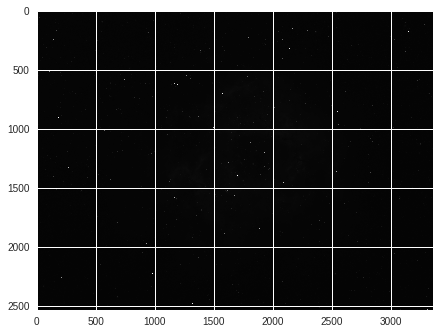

In [5]:
# show fits file 
plt.imshow(im2_aligned, cmap = 'gray', interpolation = 'None')
plt.show()

정리 차원에서 최종 코드를 첨부한다.

* [full code](https://github.com/guitar79/OA-2018/blob/master/08-4.align_fits_file_mono_16bit.py)